# **GRADED ASSIGNMENT 2**

This is a programming task dedicated to the method of least squares.

First, make your own copy of the notebook (*File $\rightarrow$ Save a copy in Drive*) or download the notebook to your machine if you prefer to work locally (*File $\rightarrow$ Download*).

Then, implement your solutions to the tasks formulated in the notebook. You can add **code cells** to write some code and **text cells** in case you want to include additional explanations to your answers in plain English.

Finally, save your notebook as a .pdf file and attach it to the submission form. **Make sure that all the cells are executed and all relevant outputs are being printed out**.


In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## **Loading the data**

<img src="https://thumbor.forbes.com/thumbor/fit-in/960x/https://www.forbes.com/wheels/wp-content/uploads/2020/08/dealer-lot-copy.jpg" width="400">

In this part of the assignment, you will be working with a toy dataset that contains infromation about ages and prices of 25 cars. Run the cell below to load the data in memory:

In [2]:
age = np.array([ 6., 26., 14., 38., 20., 31., 10.,  7.,  9.,  7., 5., 16., 20.,
                 33., 37., 26., 37., 42.,  3.,  1.,  4., 2., 31., 39., 44.])

price = np.array([19000.,  5500., 24500., 32000.,  7500., 12500., 24000., 46500.,
                  20000., 46500., 67500.,  3000., 17000., 30000., 38500.,  3500.,
                  38500.,  60000., 36000., 93500., 22500., 38500., 12500., 37500.,
                  74500.])

## **Task 1: A simple model** *(2 points)*

Imagine that you need to predict car's price based on its age. To that end, as a strating point, you decide to model the relationship between the two as a linear function:

$$car\_price = w_0 + w_1 \cdot car\_age$$

*(1 point)* **Fit a straight line to the data available using the method of least squares. What are the optimal values for the model coefficients $w_0$ and $w_0$ that you have obtained?**

<font color='red'>Do **not** use any readily-available implementation of the linear regression model. Instead, implement your own solution based on what we have derived during exercise session 3.</font>

In [3]:
# Building the X matrix: first column is all ones and second column is the age of the cars
X = np.vstack((np.ones_like(age), age)).T

w_task1 = np.linalg.inv(X.T @ X) @ X.T @ price
w_0, w_1 = w_task1

print(f"Optimal coefficients: w_0 = {w_0}, w_1 = {w_1}")

Optimal coefficients: w_0 = 33976.48378028365, w_1 = -75.61435926592763


*(1 point)* **Make a plot that would visualize the original data, as well as the predictions obtained by your model.**

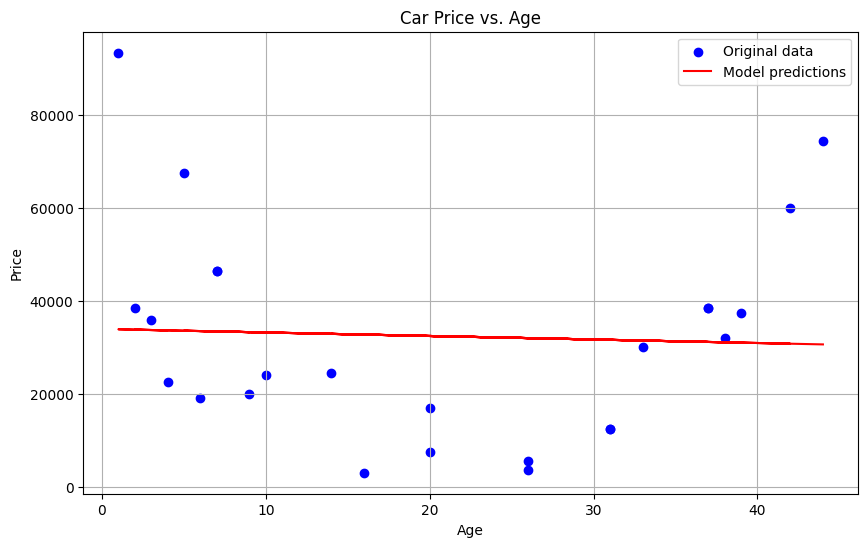

In [4]:
predictions = w_0 + w_1 * age

plt.figure(figsize=(10, 6))
plt.scatter(age, price, color='blue', label='Original data')
plt.plot(age, predictions, color='red', label='Model predictions')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Car Price vs. Age')
plt.legend()
plt.grid(True)
plt.show()

## **Task 2: Improving the fit** *(2 points)*

From the visualization you have obtained above, you can notice that the nature of the relationship between car age and its price is not linear. Indeed, both very new and very old cars can be expensive, while moderately old cars are generally cheaper. Thus, car price can be better modelled as a *quadratic* function of its age:

$$car\_price = w_0 + w_1 \cdot car\_age + w_2 \cdot car\_age^2$$

*(2 points)* **Explain how you can use the method of least squares to fit such
a quadratic curve to the data. Implement your solution and report the optimal values of the model coefficients $w_0, w_1$ and $w_2$**.

*TODO: short explanation here*

To fit this model using the method of least squares, we shall adjust our design matrix X to include an additional column for the squared term $car\_age^2$.

- The first column is all ones (for the intercept term $w_0$)
- The second column is car age (for the linear term $w_1$)
- The third column is the square of car age (for the quadratic term $w_2$)

In [5]:
# Creating the matrix X: [1, age, age^2]
X = np.vstack((np.ones_like(age), age, age**2)).T

w_task2 = np.linalg.inv(X.T @ X) @ X.T @ price
w_0, w_1, w_2 = w_task2

print(f"Optimal coefficients: w_0 = {w_0}, w_1 = {w_1}, w_2 = {w_2}")

Optimal coefficients: w_0 = 67864.16676264744, w_1 = -5679.308997156368, w_2 = 129.93792575313512


*(1 point)* **Make a plot that would visualize the original data, as well as the predictions obtained by the updated model.**

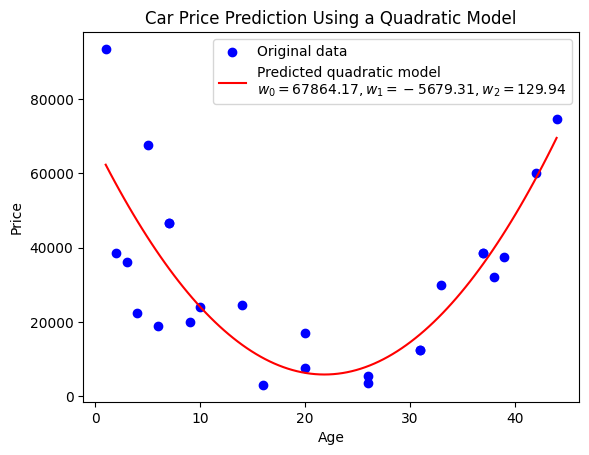

In [6]:
age_range = np.linspace(min(age), max(age), 100)

plt.scatter(age, price, color='blue', label='Original data')
predicted_price = w_0 + w_1 * age_range + w_2 * age_range**2
plt.plot(age_range, predicted_price, color='red', label=f'Predicted quadratic model\n$w_0={w_0:.2f}, w_1={w_1:.2f}, w_2={w_2:.2f}$')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()
plt.title('Car Price Prediction Using a Quadratic Model')
plt.show()

## **Task 3: Least Squares via $QR$ factorization** *(6 points)*

Solving $Xw = y$ using the method of least squares the way we have derived during the exercise session involves constructing the pseudo-inverse of the input data matrix $X$, which can be computationally expensive when $X$ is large.

A trick often used in practice is to decompose $X$ into a product of two matrices, $X = QR$, such that $Q$ is an *orthogonal* matrix, where column vectors are orthogonal  to each other and have unit lengths, and $R$ is an *upper-triangular* matrix.

Replacing $X$ by the product of $Q$ and $R$ significantly simplifies and speeds up computing the unknown $w$ due to the special properties of these matrices.

**Your task is to fit a simple model $car\_price = w_0 + w_1 \cdot car\_age$ from Task 1 once again, but this time estmating the unknown coefficients using the $QR$ factorization.**

**First, watch the following videos to learn more about $QR$-factorization and how it is used to solve least squares problems in the following videos:**
- [An Example of QR Factorization](https://youtu.be/VsyNkUo88NM)
- [Using QR Factorization to Solve Least-Squares Problems](https://youtu.be/-QY5iwNr9I4)

**When you are done, proceed with the tasks below.**


*(1 point)* **Is it possible to perform the $QR$-factorization of the matrix $X$? Answer this question by checking if columns of $X$ are linearly independent. Explain.**

*Hint: you can use [$\texttt{np.linalg.matrix_rank()}$](https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_rank.html) function to quickly compute rank of a matrix.*



**Explanation**:

The rank of a matrix is defined as the maximum number of linearly independent column vectors in the matrix. If
$X$ has a full rank equal to its number of columns, it means all the columns of
$X$ are linearly independent. If the rank is less than the number of columns, it means there are linearly dependent columns.

Linearly independent columns mean that no column in the matrix can be expressed as a linear combination of any other columns in the matrix.

In [7]:
X = np.vstack((np.ones_like(age), age)).T

# Checking the rank of X
rank_X = np.linalg.matrix_rank(X)

# Checking if X has linearly independent columns
if rank_X == X.shape[1]:
  print(f"The matrix X has full column rank ({rank_X}), so the columns are linearly independent.")
else:
  print(f"The matrix X does not have full column rank (rank: {rank_X}, expected: {X.shape[1]}), so the columns are not linearly independent.")

The matrix X has full column rank (2), so the columns are linearly independent.


**Now, perform the $QR$-decomposition of $X$ following the steps below.**

<font color='red'>Do **not** use any readily-available implementation of the $QR$-factorization. Instead, implement your own solution from scratch based on the tutorials provided above.</font>

*(1 point)* **First, construct matrix $Q$ and print it out.**

In [8]:
X = np.vstack((np.ones_like(age), age)).T

n = X.shape[1]  # number of columns in X
Q = np.zeros(X.shape)
R = np.zeros((n, n))

# Gram-Schmidt Process
for i in range(n):
    v = X[:, i]

    for j in range(i):
        R[j, i] = Q[:, j].T @ X[:, i]
        v = v - (R[j, i] * Q[:, j])

    # Normalize v to get q_i and set r_ii
    R[i, i] = np.linalg.norm(v)
    Q[:, i] = v / R[i, i]

print("Matrix Q:", Q)

Matrix Q: [[ 0.2        -0.20120299]
 [ 0.2         0.07980677]
 [ 0.2        -0.08879908]
 [ 0.2         0.24841263]
 [ 0.2        -0.00449616]
 [ 0.2         0.15005921]
 [ 0.2        -0.14500104]
 [ 0.2        -0.1871525 ]
 [ 0.2        -0.15905153]
 [ 0.2        -0.1871525 ]
 [ 0.2        -0.21525348]
 [ 0.2        -0.06069811]
 [ 0.2        -0.00449616]
 [ 0.2         0.17816019]
 [ 0.2         0.23436214]
 [ 0.2         0.07980677]
 [ 0.2         0.23436214]
 [ 0.2         0.30461458]
 [ 0.2        -0.24335445]
 [ 0.2        -0.27145543]
 [ 0.2        -0.22930397]
 [ 0.2        -0.25740494]
 [ 0.2         0.15005921]
 [ 0.2         0.26246312]
 [ 0.2         0.33271556]]


*(0.5 points)* **Verify that $Q$ is indeed orthogonal by showing that $Q^{-1} = Q^T$ (or, equivalently, that $Q^TQ = E$).**

In [9]:
# Compute Q^TQ
QTQ = np.dot(Q.T, Q)

# Creating the identity matrix E of same shape as QTQ
E = np.eye(QTQ.shape[0])

# Displaying matrices
print("Q^TQ:", QTQ)
print("\nE:", E)

# Check if QTQ is equal to E
is_orthogonal = np.allclose(QTQ, E)

if is_orthogonal:
    print("\nMatrix Q is orthogonal: Q^TQ is approximately equal to E.")
else:
    print("\nMatrix Q is NOT orthogonal: Q^TQ is not equal to E.")


Q^TQ: [[ 1.00000000e+00 -2.48881853e-16]
 [-2.48881853e-16  1.00000000e+00]]

E: [[1. 0.]
 [0. 1.]]

Matrix Q is orthogonal: Q^TQ is approximately equal to E.


*(1 point)* **Second, construct matrix $R$. Print it out and verify that it is indeed an upper-triangular matrix.**

In [10]:
print("Matrix R:", R)

# Check if R is upper triangular
is_upper_triangular = np.allclose(R, np.triu(R))

if is_upper_triangular:
    print("\nMatrix R is upper triangular.")
else:
    print("\nMatrix R is NOT upper triangular.")

Matrix R: [[  5.         101.6       ]
 [  0.          71.17190457]]

Matrix R is upper triangular.


*(0.5 point)* **Verify that $X = QR$**.

In [11]:
QR = np.dot(Q, R)

print("Matrix X: ", X)
print("\nMatrix QR: ", QR)

# Check if X is equal to QR
is_equal = np.allclose(X, QR)

if is_equal:
    print("\nMatrix X is equal to QR.")
else:
    print("\nMatrix X is NOT equal to QR. Something went wrong in the QR factorization.")

Matrix X:  [[ 1.  6.]
 [ 1. 26.]
 [ 1. 14.]
 [ 1. 38.]
 [ 1. 20.]
 [ 1. 31.]
 [ 1. 10.]
 [ 1.  7.]
 [ 1.  9.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1. 16.]
 [ 1. 20.]
 [ 1. 33.]
 [ 1. 37.]
 [ 1. 26.]
 [ 1. 37.]
 [ 1. 42.]
 [ 1.  3.]
 [ 1.  1.]
 [ 1.  4.]
 [ 1.  2.]
 [ 1. 31.]
 [ 1. 39.]
 [ 1. 44.]]

Matrix QR:  [[ 1.  6.]
 [ 1. 26.]
 [ 1. 14.]
 [ 1. 38.]
 [ 1. 20.]
 [ 1. 31.]
 [ 1. 10.]
 [ 1.  7.]
 [ 1.  9.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1. 16.]
 [ 1. 20.]
 [ 1. 33.]
 [ 1. 37.]
 [ 1. 26.]
 [ 1. 37.]
 [ 1. 42.]
 [ 1.  3.]
 [ 1.  1.]
 [ 1.  4.]
 [ 1.  2.]
 [ 1. 31.]
 [ 1. 39.]
 [ 1. 44.]]

Matrix X is equal to QR.


*(2 point)* **Finally, perform least squares via $QR$ factorization. To do so, express $w$ in terms of $Q, R$ and $y$ and compute its value.**

**Compare the coefficients that you get to those obtained in the previous tasks.**

In [12]:
# Compute Q^Ty
QTy = np.dot(Q.T, price)

# Solve for w
w_task3 = np.linalg.solve(R, QTy)

print(f"Coefficients w: {w_task3}")
print(f"Previous coefficients w from task 1: {w_task1}")
print(f"Previous coefficients w from task 2: {w_task2}")

Coefficients w: [33976.48378028   -75.61435927]
Previous coefficients w from task 1: [33976.48378028   -75.61435927]
Previous coefficients w from task 2: [67864.16676265 -5679.30899716   129.93792575]
